In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

In [ ]:
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 29 kB/s 
     |████████████████████████████████| 198 kB 60.5 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=0d820d83a26a456d9dfc3fb46c88374706c14494f70ad227cc31e646e30a7c9f
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


In [ ]:
!pip install -q findspark
import findspark
findspark.init()

In [ ]:
findspark.find()

'/content/spark-3.1.2-bin-hadoop2.7'

In [ ]:
from pyspark.sql import SparkSession

In [ ]:
spark = SparkSession.builder\
        .appName("colab")\
        .getOrCreate()

In [ ]:
df1 = spark.read.load("/content/ipl_ball_by_ball.csv",
                     format="csv", inferSchema="true", header="true")
df1.show()

+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------------+
|match_id|inning|overs|ball|      batsman|  non_striker|      bowler|batsman_runs|extra_runs|total_runs|non_boundary|is_wicket|dismissal_kind|player_dismissed|fielder|extras_type|        batting_team|        bowling_team|
+--------+------+-----+----+-------------+-------------+------------+------------+----------+----------+------------+---------+--------------+----------------+-------+-----------+--------------------+--------------------+
|  419157|     2|   16|   4|      V Kohli|R Vinay Kumar|CRD Fernando|           0|         0|         0|           0|        0|            NA|              NA|     NA|         NA|Royal Challengers...|      Mumbai Indians|
|  419157|     2|   16|   5|      V Kohli|R Vinay Kumar|CRD Fernando|           1|         0|         1|        

In [ ]:
df1.show(vertical=True)


-RECORD 0--------------------------------
 match_id         | 419157               
 inning           | 2                    
 overs            | 16                   
 ball             | 4                    
 batsman          | V Kohli              
 non_striker      | R Vinay Kumar        
 bowler           | CRD Fernando         
 batsman_runs     | 0                    
 extra_runs       | 0                    
 total_runs       | 0                    
 non_boundary     | 0                    
 is_wicket        | 0                    
 dismissal_kind   | NA                   
 player_dismissed | NA                   
 fielder          | NA                   
 extras_type      | NA                   
 batting_team     | Royal Challengers... 
 bowling_team     | Mumbai Indians       
-RECORD 1--------------------------------
 match_id         | 419157               
 inning           | 2                    
 overs            | 16                   
 ball             | 5             

In [ ]:
df1.printSchema() 

root
 |-- match_id: integer (nullable = true)
 |-- inning: integer (nullable = true)
 |-- overs: integer (nullable = true)
 |-- ball: integer (nullable = true)
 |-- batsman: string (nullable = true)
 |-- non_striker: string (nullable = true)
 |-- bowler: string (nullable = true)
 |-- batsman_runs: integer (nullable = true)
 |-- extra_runs: integer (nullable = true)
 |-- total_runs: integer (nullable = true)
 |-- non_boundary: integer (nullable = true)
 |-- is_wicket: integer (nullable = true)
 |-- dismissal_kind: string (nullable = true)
 |-- player_dismissed: string (nullable = true)
 |-- fielder: string (nullable = true)
 |-- extras_type: string (nullable = true)
 |-- batting_team: string (nullable = true)
 |-- bowling_team: string (nullable = true)



In [ ]:
from pyspark.sql.functions import isnan, when, count, col
df1.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df1.columns]).show(vertical=True)


-RECORD 0---------------
 match_id         | 0   
 inning           | 0   
 overs            | 0   
 ball             | 0   
 batsman          | 0   
 non_striker      | 0   
 bowler           | 0   
 batsman_runs     | 0   
 extra_runs       | 0   
 total_runs       | 0   
 non_boundary     | 0   
 is_wicket        | 0   
 dismissal_kind   | 0   
 player_dismissed | 0   
 fielder          | 0   
 extras_type      | 0   
 batting_team     | 0   
 bowling_team     | 0   



In [ ]:
df2 = spark.read.load("/content/ipl_matches.csv",
                     format="csv", inferSchema="true", header="true")
df2.show()

+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|match_id|      date|player_of_match|venue_id|neutral_venue|               team1|               team2|         toss_winner|toss_decision|              winner| result|result_margin|eliminator|method|    umpire1|       umpire2|
+--------+----------+---------------+--------+-------------+--------------------+--------------------+--------------------+-------------+--------------------+-------+-------------+----------+------+-----------+--------------+
|  335982|2008-04-18|    BB McCullum|      35|            0|Royal Challengers...|Kolkata Knight Ri...|Royal Challengers...|        field|Kolkata Knight Ri...|   runs|          140|         N|    NA|  Asad Rauf|   RE Koertzen|
|  335983|2008-04-19|     MEK Hussey|      31|            0|     Kings XI Punjab| Chennai Super 

In [ ]:
from pyspark.sql.functions import isnan, when, count, col
df2.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df2.columns]).show(vertical=True)


-RECORD 0--------------
 match_id        | 0   
 date            | 0   
 player_of_match | 0   
 venue_id        | 0   
 neutral_venue   | 0   
 team1           | 0   
 team2           | 0   
 toss_winner     | 0   
 toss_decision   | 0   
 winner          | 0   
 result          | 0   
 result_margin   | 0   
 eliminator      | 0   
 method          | 0   
 umpire1         | 0   
 umpire2         | 0   



In [ ]:
df2 = df2 \
  .withColumn("result_margin" ,
              df2["result_margin"]
              .cast("int"))   \
  .withColumn("date",
              df2["date"]
              .cast("timestamp"))

In [ ]:
df2.show(vertical=True)


-RECORD 0-------------------------------
 match_id        | 335982               
 date            | 2008-04-18 00:00:00  
 player_of_match | BB McCullum          
 venue_id        | 35                   
 neutral_venue   | 0                    
 team1           | Royal Challengers... 
 team2           | Kolkata Knight Ri... 
 toss_winner     | Royal Challengers... 
 toss_decision   | field                
 winner          | Kolkata Knight Ri... 
 result          | runs                 
 result_margin   | 140                  
 eliminator      | N                    
 method          | NA                   
 umpire1         | Asad Rauf            
 umpire2         | RE Koertzen          
-RECORD 1-------------------------------
 match_id        | 335983               
 date            | 2008-04-19 00:00:00  
 player_of_match | MEK Hussey           
 venue_id        | 31                   
 neutral_venue   | 0                    
 team1           | Kings XI Punjab      
 team2          

In [ ]:
df2.printSchema() 

root
 |-- match_id: integer (nullable = true)
 |-- date: timestamp (nullable = true)
 |-- player_of_match: string (nullable = true)
 |-- venue_id: integer (nullable = true)
 |-- neutral_venue: integer (nullable = true)
 |-- team1: string (nullable = true)
 |-- team2: string (nullable = true)
 |-- toss_winner: string (nullable = true)
 |-- toss_decision: string (nullable = true)
 |-- winner: string (nullable = true)
 |-- result: string (nullable = true)
 |-- result_margin: integer (nullable = true)
 |-- eliminator: string (nullable = true)
 |-- method: string (nullable = true)
 |-- umpire1: string (nullable = true)
 |-- umpire2: string (nullable = true)



In [ ]:
df3 = spark.read.load("/content/ipl_venue.csv",
                     format="csv", inferSchema="true", header="true")
df3.show()

+--------+--------------------+--------------+
|venue_id|               venue|          city|
+--------+--------------------+--------------+
|       1|Dr. Y.S. Rajasekh...| Visakhapatnam|
|       2|Sharjah Cricket S...|       Sharjah|
|       3|JSCA Internationa...|        Ranchi|
|       4|Saurashtra Cricke...|        Rajkot|
|       5|Shaheed Veer Nara...|        Raipur|
|       6|Maharashtra Crick...|          Pune|
|       7|Subrata Roy Sahar...|          Pune|
|       8|    St George's Park|Port Elizabeth|
|       9|Vidarbha Cricket ...|        Nagpur|
|      12|   Brabourne Stadium|        Mumbai|
|      13|Dr DY Patil Sport...|        Mumbai|
|      14|    Wankhede Stadium|        Mumbai|
|      15|        Eden Gardens|       Kolkata|
|      16|       Nehru Stadium|         Kochi|
|      17|De Beers Diamond ...|     Kimberley|
|      18|          Green Park|        Kanpur|
|      19|New Wanderers Sta...|  Johannesburg|
|      20|Sawai Mansingh St...|        Jaipur|
|      21|Hol

In [ ]:
df3.show(vertical=True)


-RECORD 0------------------------
 venue_id | 1                    
 venue    | Dr. Y.S. Rajasekh... 
 city     | Visakhapatnam        
-RECORD 1------------------------
 venue_id | 2                    
 venue    | Sharjah Cricket S... 
 city     | Sharjah              
-RECORD 2------------------------
 venue_id | 3                    
 venue    | JSCA Internationa... 
 city     | Ranchi               
-RECORD 3------------------------
 venue_id | 4                    
 venue    | Saurashtra Cricke... 
 city     | Rajkot               
-RECORD 4------------------------
 venue_id | 5                    
 venue    | Shaheed Veer Nara... 
 city     | Raipur               
-RECORD 5------------------------
 venue_id | 6                    
 venue    | Maharashtra Crick... 
 city     | Pune                 
-RECORD 6------------------------
 venue_id | 7                    
 venue    | Subrata Roy Sahar... 
 city     | Pune                 
-RECORD 7------------------------
 venue_id | 8 

In [ ]:
df3.printSchema()

root
 |-- venue_id: integer (nullable = true)
 |-- venue: string (nullable = true)
 |-- city: string (nullable = true)



In [ ]:
from pyspark.sql.functions import isnan, when, count, col
df3.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in df3.columns]).show(vertical=True)


-RECORD 0-------
 venue_id | 0   
 venue    | 0   
 city     | 0   



In [ ]:
df1.createOrReplaceTempView("ipl_ball_by_ball")
df2.createOrReplaceTempView("ipl_matches")
df3.createOrReplaceTempView("ipl_venue")

In [ ]:
spark.catalog.listTables()

[Table(name='ipl_ball_by_ball', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='ipl_matches', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='ipl_venue', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

SECTON-2

1

In [ ]:

elim=spark.sql("select venue_id, count(venue_id) as eliminators from ipl_matches where eliminator='Y' group by venue_id order by eliminators desc;  ").createOrReplaceTempView("elim")

In [ ]:
spark.sql("select elim.venue_id, eliminators, venue from elim, ipl_venue where elim.venue_id=ipl_venue.venue_id group by venue, elim.venue_id, eliminators order by eliminators desc limit 3;").show()

+--------+-----------+--------------------+
|venue_id|eliminators|               venue|
+--------+-----------+--------------------+
|      25|          3|Dubai Internation...|
|      38|          2|Sheikh Zayed Stadium|
|      27|          1|    Feroz Shah Kotla|
+--------+-----------+--------------------+



2

In [ ]:

spark.sql("select  fielder, count(fielder) as total_catches from ipl_ball_by_ball where dismissal_kind='caught' group by fielder order by total_catches desc limit 1;  ").show()

+----------+-------------+
|   fielder|total_catches|
+----------+-------------+
|KD Karthik|          118|
+----------+-------------+



3

In [ ]:
wicket=spark.sql("select bowler, count(bowler) as wickets, match_id from ipl_ball_by_ball where is_wicket=1 group by bowler, match_id order by wickets desc; ").createOrReplaceTempView("wicket")

In [ ]:
spark.sql("select bowler, sum(wickets) as wickets from wicket, ipl_matches where method='D/L' group by bowler order by wickets desc;").show()

+---------------+-------+
|         bowler|wickets|
+---------------+-------+
|     SL Malinga|   3572|
|       DJ Bravo|   3325|
|       A Mishra|   3211|
|      PP Chawla|   3116|
|Harbhajan Singh|   3059|
|       R Ashwin|   2907|
|        B Kumar|   2774|
|      SP Narine|   2717|
|       UT Yadav|   2603|
|  R Vinay Kumar|   2413|
|      YS Chahal|   2356|
|      RA Jadeja|   2318|
|        A Nehra|   2299|
|      JJ Bumrah|   2261|
|         Z Khan|   2261|
| Sandeep Sharma|   2223|
|      SR Watson|   2033|
|       DW Steyn|   1995|
|        P Kumar|   1938|
|      MM Sharma|   1900|
+---------------+-------+
only showing top 20 rows



4

In [ ]:
spark.sql("select overs,batsman, (sum(batsman_runs)/count(batsman_runs))*100 as Strike_rate from ipl_ball_by_ball where overs>7 and overs<20 group by batsman, overs;").show()


+-----+---------------+------------------+
|overs|        batsman|       Strike_rate|
+-----+---------------+------------------+
|   18|    DS Kulkarni| 97.05882352941177|
|   13|Harbhajan Singh| 91.42857142857143|
|   13|      R Tewatia| 86.95652173913044|
|   16|      V Shankar|             142.5|
|   14|      SPD Smith|127.64227642276423|
|   12|  Anureet Singh|             100.0|
|   17|       MR Marsh|172.22222222222223|
|   19|  TM Srivastava|              50.0|
|   15|  KW Richardson|             100.0|
|   19|     I Malhotra|             200.0|
|   18|     WPUJC Vaas|  92.3076923076923|
|   10|    T Henderson|               0.0|
|   19|   S Lamichhane|               0.0|
|   12|      R Rampaul|             100.0|
|   12|      DR Martyn|              75.0|
|   15|        M Vohra|             260.0|
|   12|    YBK Jaiswal|               0.0|
|    8|    S Badrinath| 139.4736842105263|
|   15|      RS Bopara|203.84615384615384|
|   17|        M Vijay|             190.0|
+-----+----

5

In [ ]:
match= spark.sql("select match_id, sum(extra_runs) as extra_runs from ipl_ball_by_ball group by(match_id) order by extra_runs desc;").createOrReplaceTempView("match")

In [ ]:

temp=spark.sql("select * from match, ipl_matches where match.match_id=ipl_matches.match_id;").createOrReplaceTempView("temp")

In [ ]:

spark.sql("select temp.venue_id, venue, sum(extra_runs) from temp, ipl_venue where temp.venue_id=ipl_venue.venue_id group by temp.venue_id, venue order by sum(extra_runs) desc limit 1;").show()

+--------+--------------------+---------------+
|venue_id|               venue|sum(extra_runs)|
+--------+--------------------+---------------+
|      35|M.Chinnaswamy Sta...|           1355|
+--------+--------------------+---------------+



6

In [ ]:
spark.sql("select player_of_match, count(player_of_match) from ipl_matches where neutral_venue>0 group by player_of_match order by count(player_of_match) desc;").show()

+----------------+----------------------+
| player_of_match|count(player_of_match)|
+----------------+----------------------+
|      GJ Maxwell|                     3|
|       JP Duminy|                     3|
|       JH Kallis|                     3|
|       YK Pathan|                     3|
|    Yuvraj Singh|                     2|
|  AB de Villiers|                     2|
|  Sandeep Sharma|                     2|
|    SR Tendulkar|                     2|
|       RG Sharma|                     2|
|        SK Raina|                     2|
|     LRPL Taylor|                     2|
|       ML Hayden|                     2|
|DPMD Jayawardene|                     2|
|        DR Smith|                     2|
|   KC Sangakkara|                     2|
|  M Muralitharan|                     2|
|       MK Pandey|                     2|
|    AC Gilchrist|                     2|
|     S Badrinath|                     1|
|        R Dravid|                     1|
+----------------+----------------

7

In [ ]:

spark.sql("select Batsman_, sum(batsman_runs)/count(player_dismissed) as Average from((select batsman as Batsman_,batsman_runs,player_dismissed from ipl_ball_by_ball) union all (select non_striker as Batsman_,batsman_runs,player_dismissed from ipl_ball_by_ball)) group by Batsman_ order by Average desc limit 10;").show()

+-------------+------------------+
|     Batsman_|           Average|
+-------------+------------------+
|        A Nel| 4.333333333333333|
|  C Ganapathy|               4.0|
|BW Hilfenhaus|               4.0|
|    AS Joseph| 2.292682926829268|
| BE Hendricks|2.2142857142857144|
|     RS Sodhi|               2.2|
|    VRV Singh|               2.2|
|     Umar Gul| 2.161290322580645|
|      SB Wagh|               2.0|
|NJ Rimmington|               2.0|
+-------------+------------------+



8

In [ ]:
spark.sql("select umpire, count(*) from ((select umpire1 as umpire from ipl_matches) union all (select umpire2 from ipl_matches)) ipl_matches group by umpire order by count(*) desc;").show() 

+--------------------+--------+
|              umpire|count(1)|
+--------------------+--------+
|              S Ravi|     121|
|     HDPK Dharmasena|      94|
|        AK Chaudhary|      87|
|       C Shamshuddin|      82|
|           M Erasmus|      65|
|         Nitin Menon|      57|
|           CK Nandan|      57|
|          SJA Taufel|      55|
|           Asad Rauf|      51|
|         VA Kulkarni|      50|
|        BNJ Oxenford|      48|
|         CB Gaffaney|      47|
|           RJ Tucker|      46|
|         BR Doctrove|      42|
|         RE Koertzen|      41|
|           Aleem Dar|      38|
|           BF Bowden|      37|
|            NJ Llong|      37|
|KN Ananthapadmana...|      33|
|      RK Illingworth|      31|
+--------------------+--------+
only showing top 20 rows



9

In [ ]:

v_kohli=spark.sql("select match_id, sum(batsman_runs) as batsman_runs from ipl_ball_by_ball where batsman='V Kohli' group by match_id order by batsman_runs desc limit 1;").createOrReplaceTempView("v_kohli")

In [ ]:
tempe=spark.sql("select * from v_kohli, ipl_matches where v_kohli.match_id=ipl_matches.match_id; ").createOrReplaceTempView("tempe")

In [ ]:
spark.sql("select v_kohli.match_id, tempe.batsman_runs, venue, city from v_kohli, tempe, ipl_venue where tempe.venue_id=ipl_venue.venue_id group by v_kohli.match_id, tempe.batsman_runs, venue, city order by batsman_runs desc;" ).show()

+--------+------------+--------------------+---------+
|match_id|batsman_runs|               venue|     city|
+--------+------------+--------------------+---------+
|  980999|         113|M.Chinnaswamy Sta...|Bengaluru|
+--------+------------+--------------------+---------+



10

In [ ]:

not_winner=spark.sql("select toss_winner, winner,COUNT(*) as not_win from ipl_matches where toss_winner!=winner group by toss_winner, winner;").createOrReplaceTempView("not_winner")

In [ ]:
spark.sql("select sum(not_win) from not_winner;").show()

+------------+
|sum(not_win)|
+------------+
|         398|
+------------+



In [ ]:

winners=spark.sql("select toss_winner, winner,COUNT(*) as win from ipl_matches where toss_winner==winner group by toss_winner, winner;").createOrReplaceTempView("winners")

In [ ]:
spark.sql("select sum(win) from winners;").show()

# clearly from above two queries, the who wons the toss has a high probability of winning the match as well as compared to the team who doesn't win the toss

+--------+
|sum(win)|
+--------+
|     418|
+--------+



In [ ]:
import pyspark.sql.functions as F

In [ ]:
df2.groupby('winner').agg(count('winner')).show()

+--------------------+-------------+
|              winner|count(winner)|
+--------------------+-------------+
| Sunrisers Hyderabad|           66|
| Chennai Super Kings|          106|
|                  NA|            4|
|Rising Pune Super...|           10|
|     Deccan Chargers|           29|
|Kochi Tuskers Kerala|            6|
|    Rajasthan Royals|           81|
|       Gujarat Lions|           13|
|Royal Challengers...|           91|
|Kolkata Knight Ri...|           99|
|Rising Pune Super...|            5|
|     Kings XI Punjab|           88|
|       Pune Warriors|           12|
|    Delhi Daredevils|           67|
|      Delhi Capitals|           19|
|      Mumbai Indians|          120|
+--------------------+-------------+



In [ ]:
df2=pd.read_csv("/content/ipl_matches.csv")

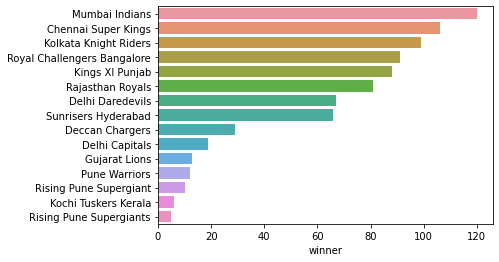

In [ ]:
import seaborn as sns
data =df2.winner.value_counts()

sns.barplot(y = data.index, x = data, orient='h');

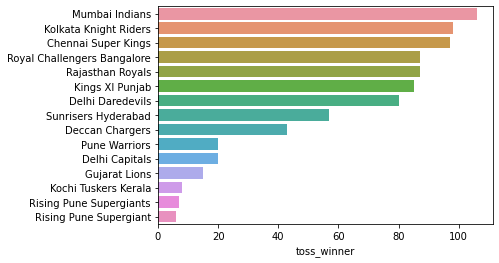

In [ ]:
data = df2.toss_winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

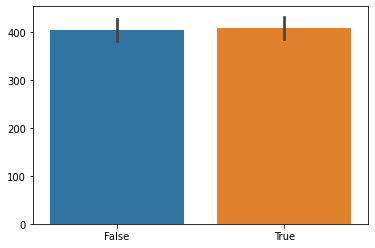

In [ ]:
import seaborn as sns
data = df2.winner==df2.toss_winner
sns.barplot(y = data.index, x = data, orient='v');

SECTION-3

In [ ]:
import pandas as pd

In [ ]:
import sqlite3
conn=sqlite3.connect("ipl.db")

In [ ]:
df1=pd.read_csv("/content/ipl_ball_by_ball.csv")

In [ ]:
df1.to_sql('balls',conn)

In [ ]:
df2=pd.read_csv("/content/ipl_matches.csv")
df2.to_sql('matches', conn)

In [ ]:
df3=pd.read_csv("/content/ipl_venue.csv")
df3.to_sql('venue', conn)

In [ ]:
import sqlite3
  
try:
    sqliteConnection = sqlite3.connect('ipl.db')
    print("Connected to SQLite")
  
    sql_query = """SELECT name FROM sqlite_master 
    WHERE type='table';"""
    cursor = sqliteConnection.cursor()
      
  
    cursor.execute(sql_query)
    print("List of tables\n")
      
  
    print(cursor.fetchall())
  
except sqlite3.Error as error:
    print("Failed to execute the above query", error)
      
finally:
    
    if sqliteConnection:
          
      
        sqliteConnection.close()
          
        print("the sqlite connection is closed")

Connected to SQLite
List of tables

[('balls',), ('matches',), ('venue',)]
the sqlite connection is closed


In [ ]:
import json

In [ ]:
class DataBase:

    def _new_(cls, *args, **kwargs):
      if cls.instance is None:
          cls.instance = super()._new_(DataBase)
          return cls.instance
      return cls.instance
    
    def _init_(self):
      self.conn = sqlite3.connect('ipl.db')
      
    def create_view(self, conn, create_view_sql):
      try:
        c=conn.cursor()
        c.execute(create_view_sql)
      except Exception as e:
        print(e)


    def get_query1_result(self):
      elim="create VIEW elim as select venue_id, count(venue_id) as eliminators from matches where eliminator='Y' group by venue_id order by eliminators desc;"
      self.create_view (conn, elim)
      cursor= conn.execute("select elim.venue_id, eliminators, venue from elim, venue where elim.venue_id=venue.venue_id group by venue, elim.venue_id, eliminators order by eliminators desc limit 3;")
      row_headers=[x[0] for x in cursor.description]
      rv = cursor.fetchmany()
      print(rv)
      json_data=[]
      for result in rv:
        json_data.append(dict(zip(row_headers,result)))
      print(json_data)
      
    def get_query2_result(self):
      cursor=conn.execute("select  fielder, count(fielder) as total_catches from balls where dismissal_kind='caught' group by fielder order by total_catches desc;")
      row_headers=[x[0] for x in cursor.description]
      rv = cursor.fetchmany()
      print(rv)
      json_data=[]
      for result in rv:
        json_data.append(dict(zip(row_headers,result)))
      print(json_data)

    def get_query3_result(self):
      wicket="create VIEW wicket as select bowler, count(bowler) as wickets, match_id from balls where is_wicket=1 group by bowler, match_id order by wickets desc; "
      self.create_view(conn,wicket)
      cursor=conn.execute("select bowler, sum(wickets) as wickets from wicket, matches where method='D/L' group by bowler order by wickets desc;")
      cursor= conn.execute("")
      row_headers=[x[0] for x in cursor.description]
      rv = cursor.fetchmany()
      print(rv)
      json_data=[]
      for result in rv:
        json_data.append(dict(zip(row_headers,result)))
      print(json_data)

    def get_query4_result(self):
      cursor= conn.execute("select overs,batsman, (sum(batsman_runs)/count(batsman_runs))*100 as Strike_rate from balls where overs>7 and overs<20 group by batsman, overs;")
      row_headers=[x[0] for x in cursor.description]
      rv = cursor.fetchmany()
      print(rv)
      json_data=[]
      for result in rv:
        json_data.append(dict(zip(row_headers,result)))
      print(json_data)

    def get_query5_result(self):
      match="create VIEW match as select match_id, sum(extra_runs) as extra_runs from balls group by(match_id) order by extra_runs desc;"
      self.create_view (conn, match)
      temp=" create VIEW temp as select * from match, matches where match.match_id=matches.match_id;"
      self.create_view (conn, temp)
      cursor= conn.execute("select temp.venue_id, venue, sum(extra_runs) from temp, venue where temp.venue_id=venue.venue_id group by temp.venue_id, venue order by sum(extra_runs) desc limit 1;")
      row_headers=[x[0] for x in cursor.description]
      rv = cursor.fetchmany()
      print(rv)
      json_data=[]
      for result in rv:
        json_data.append(dict(zip(row_headers,result)))
      print(json_data)

    def get_query6_result(self):
      cursor= conn.execute("select player_of_match, count(player_of_match) from matches where neutral_venue>0 group by player_of_match order by count(player_of_match) desc;")
      row_headers=[x[0] for x in cursor.description]
      rv = cursor.fetchmany()
      print(rv)
      json_data=[]
      for result in rv:
        json_data.append(dict(zip(row_headers,result)))
      print(json_data)

    def get_query7_result(self):
      cursor= conn.execute("select Batsman_, sum(batsman_runs)/count(player_dismissed) as Average from((select batsman as Batsman_,batsman_runs,player_dismissed \
      from balls) UNION ALL (select non_striker as Batsman_,batsman_runs,player_dismissed from balls)) \
      group by Batsman_ order by Average desc;")
      row_headers=[x[0] for x in cursor.description]
      rv = cursor.fetchmany()
      print(rv)
      json_data=[]
      for result in rv:
        json_data.append(dict(zip(row_headers,result)))
      print(json_data)

    def get_query8_result(self):
      cursor= conn.execute("select umpire, count(*) from ((select umpire1 as umpire from matches) union all (select umpire2 from matches)) matches group by umpire order by count(*) desc;")
      row_headers=[x[0] for x in cursor.description]
      rv = cursor.fetchmany()
      print(rv)
      json_data=[]
      for result in rv:
        json_data.append(dict(zip(row_headers,result)))
      print(json_data)

    def get_query9_result(self):
      v_kohli="create VIEW v_kohli as select match_id, sum(batsman_runs) as batsman_runs from balls where batsman='V Kohli' group by match_id order by batsman_runs desc limit 1;"
      self.create_view (conn, v_kohli)
      tempe="create VIEW tempe as select * from v_kohli, matches where v_kohli.match_id=matches.match_id; "
      self.create_view (conn, tempe)
      cursor= conn.execute("select v_kohli.match_id, tempe.batsman_runs, venue, city from v_kohli, tempe, venue where tempe.venue_id=venue.venue_id group by v_kohli.match_id, tempe.batsman_runs, venue, city order by batsman_runs desc;")

      row_headers=[x[0] for x in cursor.description]
      rv = cursor.fetchmany()
      print(rv)
      json_data=[]
      for result in rv:
        json_data.append(dict(zip(row_headers,result)))
      print(json_data)

    def get_query10_1_result(self):
      not_winner="create not_winner as select toss_winner, winner,COUNT(*) as not_win from matches where toss_winner!=winner group by toss_winner, winner;"
      self.create_view(conn, not_winner)
      cursor= conn.execute("select sum(not_win) from not_winner;")
      row_headers=[x[0] for x in cursor.description]
      rv = cursor.fetchmany()
      print(rv)
      json_data=[]
      for result in rv:
        json_data.append(dict(zip(row_headers,result)))
      print(json_data)

    def get_query10_2_result(self):
      winners="create VIEW winners as select toss_winner, winner,COUNT(*) as win from matches where toss_winner==winner group by toss_winner, winner;"
      self.create_view(conn,winners)
      cursor= conn.execute("select sum(win) from winners;")
      row_headers=[x[0] for x in cursor.description]
      rv = cursor.fetchmany()
      print(rv)
      json_data=[]
      for result in rv:
        json_data.append(dict(zip(row_headers,result)))
      print(json_data)

    def get_status(self,conn):
     try:
        conn.cursor()
        return True
     except Exception as ex:
        return False

    def _del_(self):
        self.conn.close()

In [ ]:
test=DataBase()
test.get_query10_2_result()

table winners already exists
[(418,)]
[{'sum(win)': 418}]
